## Handling Missing Value - Arbitrary Value Imputation 
    Arbitrary Value Imputation is a technique for handling missing values in a dataset where the missing data points are replaced with an arbitrary, fixed number.
    
    -> Key Concept 
    1. The Method :: You select a number (e.g., 999, -1, 0, or 99999) that is highly unlikely to appear in the actual 
       distribution of the variable. You then use this arbitrary value to replace all the missing entries 
       (often denoted as NaN, NULL, or None) for that specific feature.
      - Numerical Features :: -999, 99, 9999 (or any value well outside the min/max range).
      - Categorical Features :: A new string like 'Missing' or 'Not Reported' (which is essentially a 
        form of arbitrary value imputation for categorical data).
        
    2. Advantages
      -  Very fast and simple,Preserves all rows
      -  Helps model detect missing patterns
      
    3. Disadvantages
      - Distorts the Original Distribution
      - Risk of Masking Outliers

### Import Libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

### Load titanic dataset

In [18]:
data = pd.read_csv("titanic_toy.csv")
data.head(2)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1


### Get complete information about dataset

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


### Check for null values

In [24]:
print(data.isnull().sum())

Age         177
Fare         45
Family        0
Survived      0
dtype: int64


In [26]:
print(data.isnull().mean()*100)

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64


#### Splitting X and y into Train and Test Data 

In [73]:
X = data.drop(columns=['Survived'],axis = 1)
y = data['Survived']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

#### Filling Nan Values of Age and Fare Column 

In [34]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_-1'] = X_train['Age'].fillna(-1)

In [36]:
X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_-1'] = X_train['Fare'].fillna(-1)

In [38]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_-1,Fare_999,Fare_-1
379,19.0,7.7750,0,19.0,19.0,7.7750,7.7750
345,24.0,13.0000,0,24.0,24.0,13.0000,13.0000
212,22.0,7.2500,0,22.0,22.0,7.2500,7.2500
499,24.0,7.7958,0,24.0,24.0,7.7958,7.7958
356,22.0,55.0000,1,22.0,22.0,55.0000,55.0000


#### Variance Comparision For Age , Age[ 99 ] and Age[ -1 ]

In [41]:
print("Origial Age variable variance ::",X_train['Age'].var())
print("[ 99 ] Age variable variance ::",X_train['Age_99'].var())
print("[ -1 ] Age variable variance ::",X_train['Age_-1'].var())

Origial Age variable variance :: 210.2517072477438
[ 99 ] Age variable variance :: 932.9665366701436
[ -1 ] Age variable variance :: 315.99550362600644


#### Variance Comparision For Fare , Fare[ 999 ] and Fare[ -1 ]

In [44]:
print("Origial Fare variable variance ::",X_train['Fare'].var())
print("[ 999 ] Fare variable variance ::",X_train['Fare_999'].var())
print("[-1 ] Fare variable variance ::",X_train['Fare_-1'].var())

Origial Fare variable variance :: 2761.031434948639
[ 999 ] Fare variable variance :: 47525.47059536007
[-1 ] Fare variable variance :: 2675.2394049177087


### Distribution For [ Age, Age_99, and Age_-1 ] and [ Fare , Fare_999 and Fare_-1 ]

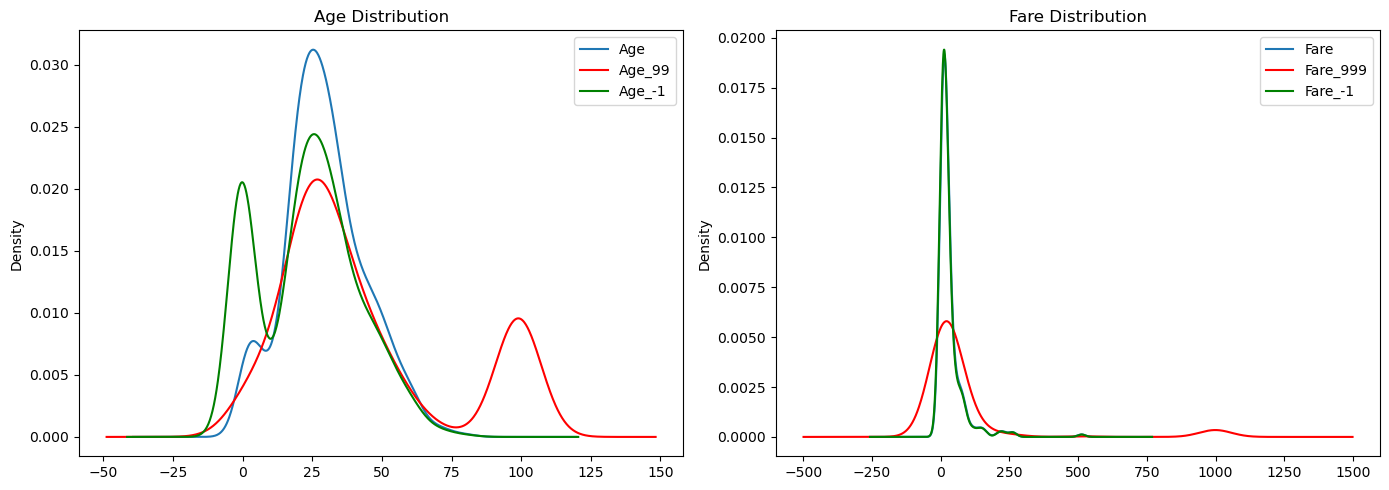

In [63]:
plt.figure(figsize=(14, 5))

# ---- First subplot: Age ----
plt.subplot(1, 2, 1)
X_train['Age'].plot(kind='kde', label='Age')
X_train['Age_99'].plot(kind='kde', color='red', label='Age_99')
X_train['Age_-1'].plot(kind='kde', color='green', label='Age_-1')
plt.legend(loc='best')
plt.title('Age Distribution')

# ---- Second subplot: Fare ----
plt.subplot(1, 2, 2)
X_train['Fare'].plot(kind='kde', label='Fare')
X_train['Fare_999'].plot(kind='kde', color='red', label='Fare_999')
X_train['Fare_-1'].plot(kind='kde', color='green', label='Fare_-1')
plt.legend(loc='best')
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()


#### X_train Co - Varianace

In [198]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_-1,Fare_999,Fare_-1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
Age_-1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
Fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
Fare_-1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


#### X_train Co - Relation 

In [200]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_-1,Fare_999,Fare_-1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017
Age_-1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159
Fare_999,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357
Fare_-1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000


### Spread and Outlier for Age and Fare 

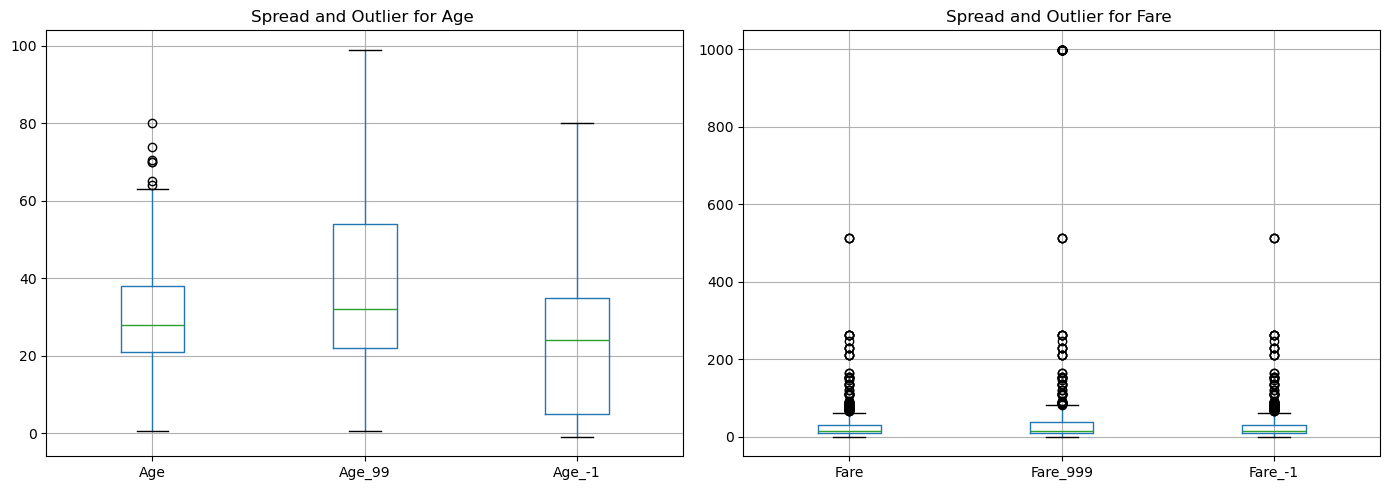

In [69]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
X_train[['Age','Age_99','Age_-1']].boxplot()
plt.title("Spread and Outlier for Age ")

plt.subplot(1,2,2)
X_train[['Fare','Fare_999','Fare_-1']].boxplot()
plt.title("Spread and Outlier for Fare ")
plt.tight_layout()
plt.show()

### Handling Missing Values By Sklearn SimpleImputer()

In [109]:
X = data.drop(columns=['Survived'],axis = 1)
y = data['Survived']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### SimpleImputer

In [112]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99 )
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [114]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare']),
    ],remainder='passthrough')

In [116]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [118]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [120]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [122]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [124]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    , 999.    ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])

In [126]:
X_train = pd.DataFrame(X_train,columns=['Age','Fare','Family'])
X_train.head()

,Age,Fare,Family
0,45.5,28.5000,0.0
1,23.0,13.0000,0.0
2,32.0,7.9250,0.0
3,26.0,7.8542,1.0
4,6.0,31.2750,6.0


### Distribution for Age and Fare

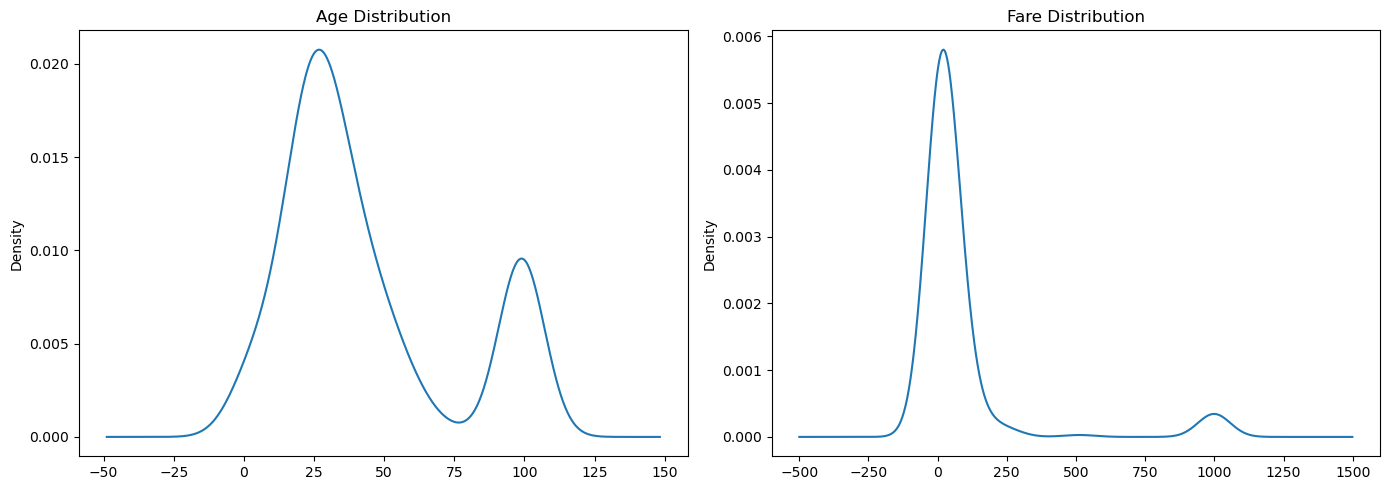

In [129]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
X_train['Age'].plot(kind='kde')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
X_train['Fare'].plot(kind='kde')
plt.title('Fare Distribution')
plt.tight_layout()
plt.show()